# **Введение**
Современные информационные системы постоянно подвергаются различным видам кибератак, что делает тему обеспечения кибербезопасности одной из наиболее актуальных в настоящее время. Рост количества сетевых угроз, усложнение механизмов их реализации и увеличение доли зашифрованного трафика приводят к тому, что традиционные методы защиты уже не всегда обеспечивают необходимый уровень безопасности.

Большинство классических систем обнаружения вторжений работает на основе сигнатурного подхода. Такой подход позволяет эффективно выявлять известные угрозы, однако он малоэффективен при новых, ранее неизвестных атаках, а также при модификациях уже существующих. В этой ситуации возрастает роль методов машинного обучения, которые способны анализировать данные, выявлять аномалии и находить закономерности, не требующие ручного описания сигнатур.

Модели машинного обучения позволяют рассматривать задачу обнаружения киберугроз как задачу классификации сетевого трафика. На основе набора характеристик сетевого потока можно определять, относится ли он к нормальной активности или представляет собой один из видов сетевой атаки. Подобные методы широко используются в современных системах обнаружения вторжений, поскольку обеспечивают более высокую гибкость и адаптивность к новым типам атак.

Целью данной курсовой работы является разработка и обучение модели машинного обучения для задачи многоклассовой классификации киберугроз на основе данных сетевого трафика. В работе применяется алгоритм «Случайный лес», который хорошо подходит для классификационных задач и способен работать с большим количеством признаков.

Для достижения поставленной цели в работе решаются следующие задачи:

* Провести анализ предметной области и изучить основные типы сетевых угроз.
* Выполнить предварительную обработку исходных данных  (очистку, анализ признаков, выявление выбросов и подготовку выборок).
* Обучить модель машинного обучения и выполнить подбор её гиперпараметров.
* Оценить качество работы модели с использованием подходящих метрик многоклассовой классификации.
* Продемонстрировать применение обученной модели для выявления киберугроз.

Работа состоит из введения, пяти основных разделов, заключения и списка используемой литературы. Структура работы соответствует последовательности выполнения всех этапов разработки модели машинного обучения для задач кибербезопасности.

# **Основная часть**

## **1. Анализ предметной области.**

## **1.1. Описание киберугроз и способов их реализации**

Сетевые кибератаки представляют собой целенаправленные действия, направленные на получение несанкционированного доступа, нарушение работоспособности систем или перехват данных. На практике существует множество видов угроз, и каждая из них реализуется по-разному. В рамках используемого набора данных встречаются такие распространённые атаки, как:

* **DDoS-атаки (Distributed Denial of Service).** Цель — перегрузить сервер большим количеством запросов, чтобы легитимные пользователи не могли получить доступ. Реализуется через массовую отправку пакетов от большого числа скомпрометированных устройств.
* **DoS-атаки (Denial of Service).** Аналогичны DDoS, но осуществляются с меньшим количеством источников. Часто основаны на отправке больших объёмов трафика или специально сформированных пакетов.
* **DrDoS-атаки (Distributed Reflection DoS).** Способ атаки, когда злоумышленник использует промежуточные серверы (например, DNS или NTP) как усилители, чтобы перенаправлять повышенный поток данных на жертву.
* **PortScan.** Сканирование портов с целью выявления открытых сервисов, что позволяет злоумышленнику определить потенциальные точки входа.
* **Botnet-активность.** Заражённые устройства получают команды от управляющего сервера и могут участвовать в атаках или передавать данные злоумышленнику.
* **Атака R2L (Remote-to-Local)**.
  
R2L — это атака, при которой удалённый пользователь пытается получить доступ к локальной системе, не имея соответствующих прав. Обычно такие атаки направлены на подбор учётных данных, использование уязвимостей сервисов, эксплуатацию неправильных настроек протоколов.

Эти типы атак отличаются по поведению сетевого трафика: частоте пакетов, направлению, объёму передаваемых данных и задержкам между пакетами. Благодаря этим особенностям их можно обнаруживать с помощью анализа сетевых характеристик.

## **1.2. Существующие подходы к выявлению киберугроз**

Подходы к обнаружению сетевых атак можно разделить на несколько основных групп:

**Сигнатурные методы:**
Основаны на базе заранее известных сигнатур, то есть шаблонов атак. Такие методы эффективны против хорошо изученных угроз, но плохо работают на новых или модифицированных атаках.

**Аномальные методы:**
Эти системы сравнивают текущий сетевой трафик с «нормальным» профилем поведения. Если трафик резко отличается от обычного, система фиксирует аномалию. Такой подход позволяет выявлять новые атаки, но требует тонкой настройки.

**Гибридные методы:**
Комбинируют сигнатурный анализ и анализ аномалий. Используются во многих современных системах обнаружения вторжений (IDS/IPS).

Методы машинного обучения.
Применяются всё активнее, так как модели способны самостоятельно выявлять закономерности в данных, классифицировать трафик и обнаруживать различные типы атак без ручного описания их признаков.

## **1.3. Возможность применения методов машинного обучения**

Использование методов машинного обучения в задачах сетевой безопасности обусловлено несколькими преимуществами:

* Модель способна анализировать сложные многомерные данные, которые трудно обработать вручную.
* Алгоритмы могут выявлять неожиданные закономерности и аномалии.
* Машинное обучение хорошо работает на больших объёмах трафика, что важно для современных сетей.
* Можно обучить модель на множестве классов атак и затем применять её в реальном времени.
* Обновление модели не требует переписывания логики — достаточно переобучения на новых данных.

В данной работе используется Случайный лес, так как он:

*   устойчив к шуму и выбросам,
*   хорошо работает с большими наборами признаков,
*   даёт высокое качество на задачах классификации,
*   не требует сложной настройки.

## **1.4. Описание исходных данных и физический смысл атрибутов**

В работе используется набор данных сетевого трафика, где каждый объект представляет собой отдельный сетевой поток. Каждый поток описан набором характеристик, которые используются для анализа.

Ниже приведены основные признаки:

*   protocol: Протокол передачи (TCP, UDP etc). Позволяет выделить тип взаимодействия.
*   flow_duration:	Длительность сетевого потока в микросекундах. Длинные или слишком короткие длительности могут указывать на аномалии.
*   total_forward_packets:	Общее число пакетов, отправленных от клиента к серверу.
*   total_backward_packets:	Количество пакетов в обратном направлении.
*   total_forward_packets_length:	Общий объём данных в прямом направлении.
*   total_backward_packets_length:	Объём данных в обратном направлении.
*   forward_packet_length_mean:	Средний размер пакетов в прямом направлении.
*   backward_packet_length_mean:	Средний размер пакетов в обратном направлении.
*   forward_packets_per_second:	Скорость отправки пакетов вперёд.
*   backward_packets_per_second:	Скорость отправки пакетов назад.
*   forward_iat_mean:	Среднее межпакетное время в прямом направлении.
*   backward_iat_mean:	Среднее межпакетное время в обратном направлении.
*   flow_iat_mean:	Среднее время между пакетами всего потока.
*   flow_packets_per_second:	Общая скорость передачи пакетов.
*   flow_bytes_per_second:	Скорость передачи данных.
*   label / label_encoded:	Класс сетевого трафика: нормальный либо тип атаки.

## **2. Подготовка исходных данных.**

В этом разделе рассмотрены этапы подготовки набора данных к обучению модели машинного обучения. Корректная обработка данных важна, поскольку качество модели напрямую зависит от полноты, корректности и структуры исходных признаков.

Этот раздел содержит описание и программную реализацию этапов
подготовки данных для модели машинного обучения:


* выявление дубликатов (при наличии дубликатов указать способ их
обработки);
* выявление пропусков в данных (при наличии пропусков необходимо описать методы их обработки);
* преобразование категориальных признаков в числовые (обосновать и описать метод кодирования);
* выявление выбросов в значениях признаков (описание методов выявления выбросов):
* корреляционный анализ признаков на предмет выявления неинформативных признаков, а также признаков, оказывающих наибольшее
влияние на целевую переменную;
* формирование обучающей и тестовой выборок.

Перед началом подготовки данных и обучения модели были подключены основные библиотеки, которые используются для обработки данных, визуализации и построения модели случайного леса.

**pandas** - библиотека для работы с табличными данными. Используется для загрузки датасета, преобразования столбцов, удаления дубликатов, анализа признаков и формирования обучающих выборок.

**numpy** - библиотека для работы с числовыми массивами и выполнения математических операций. Применяется при расчётах статистик, диапазонов значений и создании наборов параметров для подбора гиперпараметров.

**matplotlib.pyplot** - средство для построения графиков. Используется для визуализации распределений признаков, построения графиков выбросов, матриц корреляций и графиков качества модели.

**train_test_split (sklearn.model_selection)** - функция для разделения данных на обучающую и тестовую части. Позволяет выделить выборку для обучения модели и отдельную выборку для оценки качества.

**LabelEncoder (sklearn.preprocessing)** - класс для преобразования категориальных меток в числовой формат. Применяется для кодирования целевого признака, поскольку модели scikit-learn работают с числовыми значениями.

**RandomForestClassifier (sklearn.ensemble)** - основная модель данного проекта — классификатор случайного леса. Используется для решения задачи многоклассовой классификации и выявления типа сетевой активности по набору числовых признаков.

**seaborn** - библиотека визуализации, построенная поверх matplotlib. Используется для построения более наглядных графиков, например тепловых карт (correlation heatmap) для анализа взаимосвязей между признаками.

**ValidationCurve (yellowbrick.model_selection)** - инструмент для визуализации зависимости качества модели от изменения конкретного гиперпараметра. Применяется для анализа параметров случайного леса (max_depth, n_estimators, max_features и др.) и выбора оптимальных значений.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from yellowbrick.model_selection import ValidationCurve
from sklearn.inspection import permutation_importance



## **2.1 Загрузка данных**
На первом этапе подготовки данных необходимо загрузить исходный датасет, содержащий сетевые записи, используемые для последующего анализа и построения модели машинного обучения. Данные представлены в формате CSV и включают набор признаков, характеризующих сетевые потоки, а также целевую метку, определяющую класс сетевой активности.

Для загрузки данных используется библиотека pandas, которая предоставляет удобные средства работы с табличными структурами. После загрузки датасета выполняется предварительное ознакомление с ним при помощи метода info(), позволяющего получить общую информацию о составе таблицы: количество строк и столбцов, типы данных и наличие пропусков.



In [2]:
df = pd.read_csv('/content/Данные_3.csv')
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   protocol                       29999 non-null  int64  
 1   flow_duration                  29999 non-null  int64  
 2   total_forward_packets          29999 non-null  int64  
 3   total_backward_packets         29999 non-null  int64  
 4   total_forward_packets_length   29999 non-null  int64  
 5   total_backward_packets_length  29999 non-null  int64  
 6   forward_packet_length_mean     29999 non-null  float64
 7   backward_packet_length_mean    29999 non-null  float64
 8   forward_packets_per_second     29999 non-null  float64
 9   backward_packets_per_second    29999 non-null  float64
 10  forward_iat_mean               29999 non-null  float64
 11  backward_iat_mean              29999 non-null  float64
 12  flow_iat_mean                  29999 non-null 

,protocol,flow_duration,total_forward_packets,total_backward_packets,total_forward_packets_length,total_backward_packets_length,forward_packet_length_mean,backward_packet_length_mean,forward_packets_per_second,backward_packets_per_second,forward_iat_mean,backward_iat_mean,flow_iat_mean,flow_packets_per_seconds,flow_bytes_per_seconds,label
0,17,2468,4,0,1580,0,395.0,0.0,1.620746e+03,0.0,822.666667,0.0,822.666667,1.620746e+03,6.401945e+05,DrDoS_DNS
1,17,133,4,0,5888,0,1472.0,0.0,3.007519e+04,0.0,44.333333,0.0,44.333333,3.007519e+04,4.427068e+07,DrDoS_DNS
2,17,33509,200,0,88000,0,440.0,0.0,5.968546e+03,0.0,168.386935,0.0,168.386935,5.968546e+03,2.626160e+06,DrDoS_DNS
3,17,288495,200,0,88000,0,440.0,0.0,6.932529e+02,0.0,1449.723618,0.0,1449.723618,6.932529e+02,3.050313e+05,DrDoS_DNS
4,17,9,2,0,2062,0,1031.0,0.0,2.222222e+05,0.0,9.000000,0.0,9.000000,2.222222e+05,2.291111e+08,DrDoS_DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,17,31640,200,0,88000,0,440.0,0.0,6.321113e+03,0.0,158.994975,0.0,158.994975,6.321113e+03,2.781290e+06,R2L
29995,17,48,2,0,772,0,386.0,0.0,4.166667e+04,0.0,48.000000,0.0,48.000000,4.166667e+04,1.608333e+07,R2L
29996,17,34700,200,0,88000,0,440.0,0.0,5.763689e+03,0.0,174.371859,0.0,174.371859,5.763689e+03,2.536023e+06,R2L
29997,17,1,2,0,1950,0,975.0,0.0,2.000000e+06,0.0,1.000000,0.0,1.000000,2.000000e+06,1.950000e+09,R2L


## **2.2. Распределение целевой переменной**

Целевая переменная в данном проекте — это тип сетевой активности, который может принимать одно из трёх значений:
BENIGN, DrDoS_DNS, R2L.
Перед началом построения модели важно изучить распределение классов, чтобы оценить баланс данных и выявить возможные перекосы в сторону какого-либо класса. Для этого была выполнена визуализация распределения меток при помощи библиотеки seaborn, а также построена таблица с количеством объектов каждого класса.

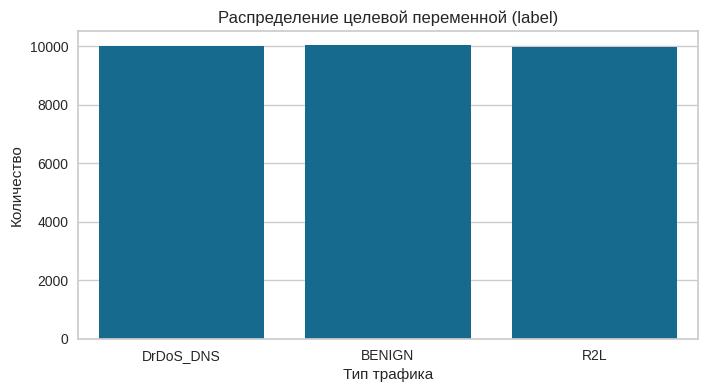

label
BENIGN       10027
DrDoS_DNS     9990
R2L           9982
Name: count, dtype: int64


In [3]:
plt.figure(figsize = (8,4))
sns.countplot(x = df['label'])
plt.title('Распределение целевой переменной (label)')
plt.xlabel('Тип трафика')
plt.ylabel('Количество')
plt.show()
print(df['label'].value_counts())


Целевая переменная **label** содержит три класса, соответствующие типам сетевого трафика, участвующим в задаче выявления киберугроз. Классы распределены следующим образом:

*  BENIGN — 10027 записей. Обычный, легитимный сетевой трафик без признаков атак. Используется моделью как эталон нормального поведения сети.
*  DrDoS_DNS — 9990 записей.
Тип распределённой атаки отказа в обслуживании (DDoS), основанный на механизме DNS Amplification.
Атакующий отправляет поддельные DNS-запросы с адресом жертвы, в результате чего DNS-серверы возвращают значительно увеличенные ответы на сторону жертвы, создавая перегрузку сети.
*  R2L (Remote-to-Local) — 9982 записи. Класс атак, при которых злоумышленник пытается удалённо получить доступ к локальной машине, не имея на это легитимных прав.

## **2.3. Выявление и обработка дубликатов**

На первом этапе был выполнен анализ на наличие повторяющихся строк. Дубликаты могут появляться при объединении разных частей датасета или при ошибках записи логов сетевого трафика. Такие записи могут смещать распределение данных и ухудшать качество модели.

Проверка проводилась с помощью команды `df.duplicated().sum()`. В результате анализа было обнаружено 121 дубликат, что является значительным количеством для задачи классификации сетевого трафика. Для исключения влияния повторяющихся записей дубликаты были удалены с использованием метода `df.drop_duplicates()`. После удаления количество строк в датасете уменьшилось, и дальнейшая обработка выполнялась уже на очищенной выборке.

In [4]:
print(f"Дубликаты: {df.duplicated().sum()}")
df = df.drop_duplicates()

Дубликаты: 121


## **2.4. Выявление и обработка пропусков**

Следующим шагом был анализ пропусков в данных. Наличие пустых значений может мешать обучению модели, особенно алгоритмам, которые не умеют работать с пропусками напрямую.

Проверка выполнялась с помощью `df.isnull().sum()`. Анализ показал, что в используемом наборе данных пропусков нет, поэтому дополнительные методы обработки (удаление или заполнение константой) не применялись.

In [5]:
df.isnull().sum()

,0
protocol,0
flow_duration,0
total_forward_packets,0
total_backward_packets,0
total_forward_packets_length,0
total_backward_packets_length,0
forward_packet_length_mean,0
backward_packet_length_mean,0
forward_packets_per_second,0
backward_packets_per_second,0


## **2.5. Преобразование категориальных признаков**

В наборе данных присутствовал один категориальный признак — label, который содержит классы сетевого трафика. Алгоритмы машинного обучения работают с числовыми данными, поэтому категориальные значения необходимо преобразовать.

Для кодирования использован LabelEncoder, так как:

*   признак является целевым;
*   классы не имеют порядка, но должны быть переведены в числовой вид;
*   этот способ кодирования прост и чаще всего применяется для метки класса.

В результате каждому классу была присвоена числовая метка, и в датасете появился новый признак **label_encoded**.

In [6]:
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])
df[['label', 'label_encoded']]


/tmp/ipython-input-751319754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label_encoded'] = le.fit_transform(df['label'])


,label,label_encoded
0,DrDoS_DNS,1
1,DrDoS_DNS,1
2,DrDoS_DNS,1
3,DrDoS_DNS,1
4,DrDoS_DNS,1
...,...,...
29994,R2L,2
29995,R2L,2
29996,R2L,2
29997,R2L,2


## **2.6. Выявление выбросов**

Выбросами называют такие значения признаков, которые существенно отклоняются от основной массы данных и не вписываются в типичное распределение. В наборах сетевого трафика выбросы встречаются довольно часто, поскольку сами кибератаки нередко сопровождаются резкими скачками длительности сессий, количества пакетов, скоростей передачи и других параметров. Поэтому анализ выбросов требуется не только для поиска ошибок в данных, но и для понимания природы аномального поведения трафика.

В рамках курсовой работы для выявления выбросов применялся статистический метод на основе межквартильного размаха (IQR), который является стандартным в анализе числовых данных.

Основная идея метода заключается в том, что выбросы находятся за границами интервала, определённого квартилями 𝑄1 и 𝑄3
	​
$$
IQR = Q_3 - Q_1
$$

Далее устанавливаются нижняя и верхняя границы допустимых значений:

$$
Lower = Q_1 - 1.5 \cdot IQR
$$


$$
Upper = Q_3 + 1.5 \cdot IQR
$$

Все точки, которые лежат ниже Lower или выше Upper, считаются выбросами.Такой подход применяется независимо к каждому числовому признаку.
Особенности метода при работе с сетевым трафиком. В отличие от классических задач, где выбросами могут быть ошибочные значения, в трафике выбросы очень часто являются нормальным проявлением атакующего поведения. Например:

* при DrDoS-атаках скорость отправки пакетов растёт на несколько порядков;
* при R2L-атаках появляются аномально короткие или длинные сессии;
* встречаются всплески длины пакетов, нехарактерные для обычного трафика.

Поэтому важной задачей является не удаление выбросов, а корректная идентификация по каждому признаку.


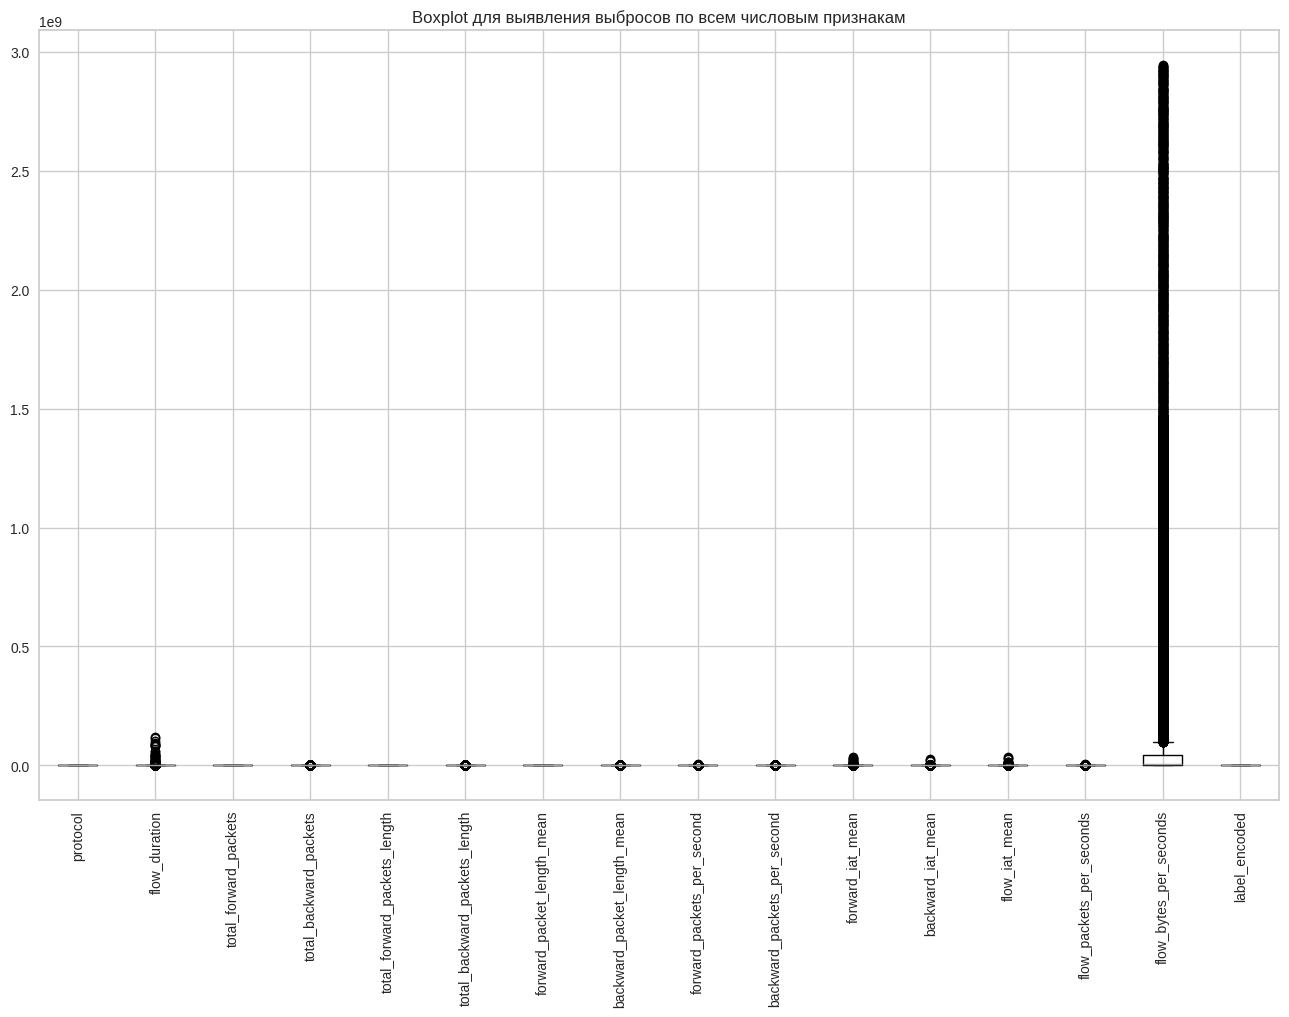

In [7]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(16, 10))
df[num_cols].boxplot()
plt.xticks(rotation = 90)
plt.title("Boxplot для выявления выбросов по всем числовым признакам")
plt.show()


In [8]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(col, outliers)


protocol 0
flow_duration 2969
total_forward_packets 0
total_backward_packets 989
total_forward_packets_length 0
total_backward_packets_length 989
forward_packet_length_mean 0
backward_packet_length_mean 989
forward_packets_per_second 6056
backward_packets_per_second 989
forward_iat_mean 3567
backward_iat_mean 984
flow_iat_mean 4516
flow_packets_per_seconds 6056
flow_bytes_per_seconds 4759
label_encoded 0


**Результаты анализа выбросов**

Для всех числовых признаков были вычислены верхние и нижние границы по методу IQR. Наибольшее количество выбросов наблюдалось в следующих признаках:

* flow_duration
* forward_packets_per_second
* flow_bytes_per_seconds
* flow_iat_mean
* total_forward_packets
* total_backward_packets

Эти признаки демонстрируют наибольшую вариативность и отражают как особенности атак, так и естественные скачки сетевой нагрузки.
Признаки же со стабильно низким числом выбросов (например, protocol) являются структурными и не несут выраженной динамической компоненты.

## **2.7 Корреляционный анализ и определение информативности признаков**
На этом этапе выполняется комплексный анализ признаков для того, чтобы определить их влияние на целевую переменную и выявить те параметры сетевого трафика, которые оказывают наибольшее влияние на качество классификации.
Для этого используются три взаимодополняющих подхода:

**Корреляционный анализ признаков**

**MDI (Mean Decrease Impurity) — встроенная важность признаков в RandomForest**

**Permutation Feature Importance — перестановочная важность признаков**

Такой комплексный подход позволяет получить более объективную картину и избежать ошибок, связанных с использованием только одного метода оценки.

На первом шаге была вычислена матрица корреляций числовых признаков. Она показывает степень линейной связи между различными параметрами сетевых потоков.
Для визуализации использовалась тепловая карта:

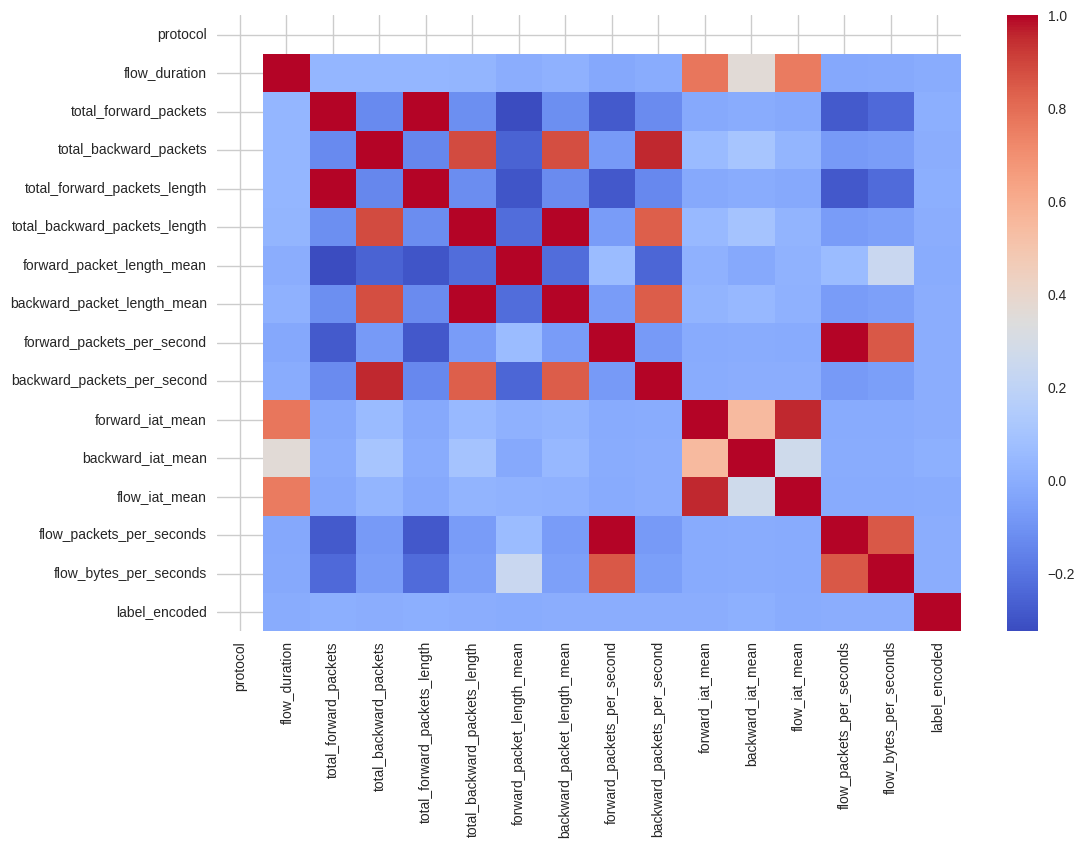

In [9]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.drop(columns = ['label']).corr(), cmap='coolwarm')
plt.show()


Сделаем временные наборы данных для определения важноссти признаков

In [11]:
X1 = df.drop(['label', 'label_encoded'], axis = 1)
y1 = df['label_encoded']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,
                                                         random_state = 15,
                                                         test_size = 0.3)


После обучения временной модели случайного леса был получен рейтинг признаков по встроенной важности (MDI). Он показывает, насколько каждый из признаков уменьшает критерий неопределённости (Gini или энтропию) при разбиении в деревьях.

In [12]:
temp_model = RandomForestClassifier(
    n_estimators = 100,
    random_state = 15,
    n_jobs = -1
)

temp_model.fit(X1_train, y1_train)

importances = temp_model.feature_importances_

fi_df = pd.DataFrame({
    'feature': X1_train.columns,
    'importance': importances
}).sort_values(by = 'importance', ascending=False)

fi_df


,feature,importance
14,flow_bytes_per_seconds,0.223302
4,total_forward_packets_length,0.153941
6,forward_packet_length_mean,0.153241
1,flow_duration,0.092169
8,forward_packets_per_second,0.090374
12,flow_iat_mean,0.090374
13,flow_packets_per_seconds,0.089823
10,forward_iat_mean,0.089227
2,total_forward_packets,0.006781
9,backward_packets_per_second,0.003387


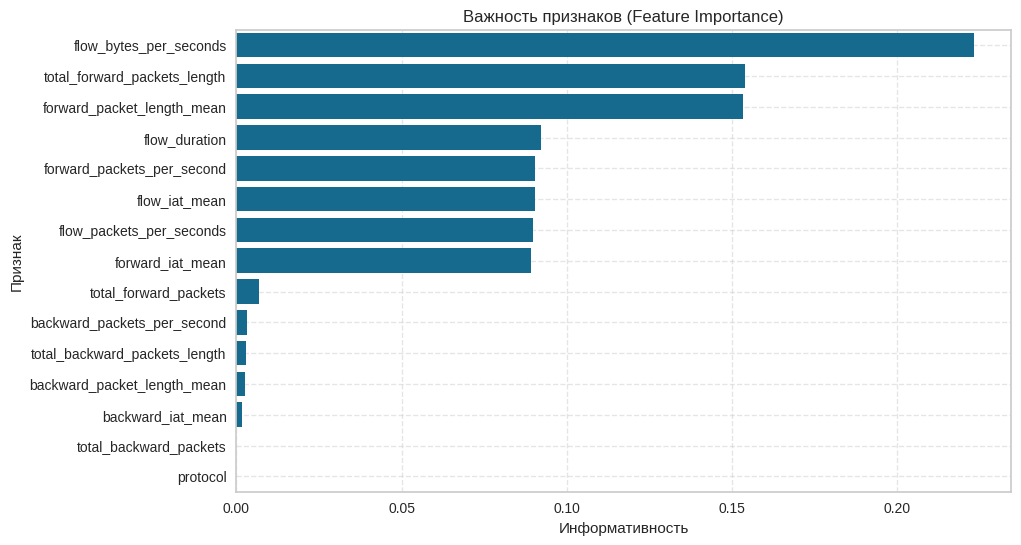

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(data=fi_df, x = 'importance', y = 'feature')
plt.title('Важность признаков (Feature Importance)')
plt.xlabel('Информативность')
plt.ylabel('Признак')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


MDI показывает, что наибольший вклад в работу модели вносят признаки, связанные с объёмом трафика (flow_bytes_per_seconds), размерами пакетов (forward_packet_length_mean), скоростью передачи (forward_packets_per_second) и длительностью соединения (flow_duration).
Признаки backward-направления показывают почти нулевое значение важности. 

Для подтверждения результатов MDI был использован перестановочный анализ, который измеряет снижение качества модели после случайной перестановки значений каждого признака.

In [14]:
perm = permutation_importance(temp_model,
                              X1_test,
                              y1_test,
                              n_repeats = 10,
                              random_state = 15)

perm_df = pd.DataFrame({
    'feature': X1_train.columns,
    'importance': perm.importances_mean}).sort_values(by = 'importance', ascending=False)

perm_df


,feature,importance
6,forward_packet_length_mean,0.004094
9,backward_packets_per_second,0.001138
4,total_forward_packets_length,0.000792
11,backward_iat_mean,0.000747
5,total_backward_packets_length,0.000457
7,backward_packet_length_mean,0.000268
0,protocol,0.000000
3,total_backward_packets,-0.000033
10,forward_iat_mean,-0.000826
2,total_forward_packets,-0.000904


В отличие от MDI, перестановочная важность показывает реальное влияние признака на качество модели. 

Результаты демонстрируют, что:
* по-настоящему значимыми являются только несколько признаков, связанных с количеством пакетов и интенсивностью трафика;
* многие признаки имеют нулевую или отрицательную важность, то есть их перестановка не ухудшает качество модели;
* отрицательные значения означают, что признаки не только бесполезны, но могут даже случайно «мешать» модели.

Совместный анализ MDI, permutation importance и корреляционной матрицы позволяет сделать следующие выводы:

Существенный вклад в классификацию вносят только 4 признака

* forward_packet_length_mean
* flow_duration
* forward_packets_per_second
* forward_iat_mean

Признаки backward-трафика и параметры общего количества пакетов демонстрируют минимальную важность и могут быть исключены без потери качества. Исключение лишних признаков уменьшает размерность данных, снижает риск переобучения и ускоряет работу алгоритма. На следующем этапе обучения модели учитывается только сокращённый набор информативных признаков.

## **2.8. Формирование обучающей и тестовой выборок**

После завершения этапов предобработки данных необходимо сформировать обучающую и тестовую выборки, на основе которых будет выполняться обучение и последующая оценка модели. Правильное разбиение данных играет ключевую роль, поскольку позволяет объективно оценить способность модели к обобщению и предотвращает переобучение.

**Цель разбиения данных**

Основная задача разделения данных заключается в том, чтобы модель обучалась только на части примеров, а оставшаяся часть использовалась исключительно для проверки качества классификации. Это обеспечивает корректную оценку эффективности модели на новых, ранее невидимых данных.

Пусть имеется исходная выборка:

$$
D = \{(x_i,\; y_i)\}_{i=1}^{n}
$$



**Практическая реализация**

Разбиение выполнялось с использованием функции train_test_split из библиотеки scikit-learn с учётом:

параметра test_size = 0.3, фиксации случайного состояния random_state = 15 (для воспроизводимости).
Использование random_state гарантирует, что разбиение будет одинаковым при каждом запуске, что важно для корректного сравнения результатов.


После разбиения были получены:

* обучающая выборка размером 20914 объектов,
*  тестовая выборка размером 8964 объекта.


In [15]:
selected_features = [
    'forward_packet_length_mean',
    'flow_duration',
    'forward_packets_per_second',
    'forward_iat_mean'
]

X = df[selected_features]
y = df['label_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 15
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((20914, 4), (8964, 4), (20914,), (8964,))

# **3. Обучение модели машинного обучения.**


### **3.1. Постановка задачи**

В данной работе требуется разработать модель машинного обучения, которая выполняет автоматическую классификацию сетевых сессий по их принадлежности к определённому типу трафика. Каждая запись в исходном наборе данных описывается набором статистических признаков, характеризующих длительность соединения, количество пакетов, размеры переданных данных и другие параметры сетевого взаимодействия.

Целевая переменная принимает одно из трёх возможных значений:

*  BENIGN — нормальный сетевой трафик;
*  DrDoS_DNS — отражённая DDoS-атака с использованием DNS-усиления;
*  R2L — Remote-to-Local атаки, направленные на получение удалённого доступа к системе.

Таким образом, множества классов можно задать следующим образом:

$$
y \in \{0,\; 1,\; 2\}
$$

где:
0 — BENIGN,
1 — DrDoS_DNS,
2 — R2L.

**Цель задачи**

Создать модель, которая по набору входных признаков сетевой сессии автоматически определяет её принадлежность к одному из трёх классов, обеспечивая высокую точность классификации и возможность дальнейшего применения в системах обнаружения вторжений.

**Формальная постановка**

Пусть задана обучающая выборка:

$$
D = {(x_i, y_i)}_{i=1}^n
$$

где
$x_i ∈ R^d$ — вектор признаков,
$y_i ∈ {1, 2, …, K}$ — метка класса.

Необходимо построить классифицирующее отображение:

$$
f(x) \rightarrow y
$$

которое каждому объекту 𝑥 из пространства признаков ставит в соответствие класс 𝑦.

**Тип задачи**

Поскольку целевая переменная состоит из трёх различных категорий, задача относится к многоклассовой классификации. Для её решения используется ансамблевый метод — случайный лес, обладающий устойчивостью, высокой точностью и способностью выявлять нелинейные зависимости в данных.

## **3.2. Описание алгоритма случайного леса**

**Случайный лес (Random Forest)** является ансамблевым алгоритмом машинного обучения, основанным на идее построения большого числа решающих деревьев и последующего объединения их предсказаний. Данный метод на сегодняшний день является одним из наиболее устойчивых и практичных алгоритмов для задач классификации и обнаружения кибератак.

Идея случайного леса опирается на уменьшение дисперсии модели за счёт усреднения результатов нескольких «слабых» классификаторов. В отличие от единичного дерева решений, которое склонно к сильному переобучению, ансамбль деревьев демонстрирует высокую способность к обобщению даже на шумных данных.

### **3.2.1 Дерево решений**

Дерево решений — это базовый алгоритм, используемый внутри случайного леса. Оно строится как последовательность разбиений выборки на более однородные группы. Основная идея заключается в том, чтобы на каждом шаге выбрать такой признак и такое пороговое значение, которые максимально уменьшают «неоднородность» данных в текущем узле.

Пусть нам дана обучающая выборка:

$$
D = \{(x_i, y_i)\}_{i=1}^{n}
$$

Разбиение узла на два подузла происходит так:

$$
D_{left} = \{x_i \mid x_{i,j} \leq s\}, \qquad  
D_{right} = \{x_i \mid x_{i,j} > s\}
$$

где $x_ij$ - значение $j$-го признака, а $s$ - порог.

Для оценки качества разбиения чаще всего используется критерий Джини:

$$
Gini(D) = 1 - \sum_{k=1}^{K} p_k^2
$$

где $p_k$ — доля объектов класса $k$ в узле.

Качество разбиения считается по формуле:

$$
Q = Gini(D) - \frac{|D_{left}|}{|D|} Gini(D_{left})
       - \frac{|D_{right}|}{|D|} Gini(D_{right})
$$

Чем выше
$Q$, тем лучше разбиение.

Дерево строится рекурсивно, пока не выполнится условие остановки: минимальное число объектов в листе, максимальная глубина и т. д.

* Плюсы дерева: простая интерпретация, работа с разнородными признаками.
* Минус: склонность к переобучению.

### **3.2.2. Бутстрэп-выборки**

В случайном лесе каждое дерево обучается не на всей исходной выборке, а на её случайной версии, собранной методом бутстрэпинга. Пусть исходная выборка X состоит из n объектов. Бутстрэп-выборка $X_T$ формируется следующим образом:

* производится n независимых выборов объектов из X;
* каждый объект выбирается с вероятностью 1 / n;
* допускается многократное попадание одного и того же объекта.

Вероятность того, что фиксированный объект не попадёт в бутстрэп-выборку:

$$
\left(1 - \frac{1}{n}\right)^n \approx e^{-1} \approx 0.368
$$

Эти 36.8% объектов образуют набор OOB (out-of-bag), который используется позже для оценки качества модели. Использование бутстрэп-выборок даёт деревьям «разнообразие» и снижает их корреляцию.

### **3.2.3. Бэггинг**

Бэггинг (Bootstrap Aggregating) — это ансамблевый метод, объединяющий несколько моделей, обученных на различных бутстрэп-выборках.

Пусть обучено $T$ базовых моделей

$b_1(x), b_2(x), …, b_T(x)$

Их итоговое решение принимается методом голосования:

$ŷ(x) = mode({b_t(x)}_{t=1}^{T})$

С точки зрения статистики, бэггинг уменьшает разброс модели:

**Смещение (Bias)**

Смещение базовой модели:

$Bias(b) = E_X[y(x)] - E_X[b(x, X)]$

Смещение ансамбля:

$Bias(a) = E_X[y(x)] - E_X[a(x, X)]$

Так как

$a(x, X) = (1 / T) · ∑_{t=1}^{T} b_t(x, X)$

получаем:

$Bias(a) = Bias(b)$

То есть бэггинг не изменяет смещение модели.

**Разброс (Variance)**

Если дисперсии базовых моделей одинаковы, то дисперсия ансамбля:

$Varience(a) = (1 / T) · Var(b) + (1 / T^2) · ∑_{i≠j} Cov(b_i, b_j)$

Отсюда следует:

* при высокой корреляции базовых моделей выигрыш минимален;
* при низкой корреляции разброс существенно уменьшается;
* в идеальном случае $Var(a) ≈ Var(b) / T$


### **3.2.4. Метод случайных подпространств (Random Subspaces)**

Этот метод добавляет ещё один уровень случайности: на каждом разбиении дерева выбирается не весь набор признаков, а только случайная его часть.

Пусть всего признаков
𝑀, а на каждом узле выбираются только 𝑚 признаков:

$$
m = \sqrt{M} \quad \text{в задаче классификации}
$$

Для каждого узла алгоритм:

1. Выбрать случайное подмножество признаков 𝐹𝑡, |𝐹𝑡| = m.
2. Найти лучшее разбиение только среди признаков 𝐹𝑡.
3. Продолжить рекурсивное построение дерева.

Это снижает корреляцию между моделями и, как следствие, уменьшает разброс ансамбля.

## **3.3. Описание классов библиотеки Scikit-learn, реализующих модель случайного леса**

Для построения модели классификации в данной работе используется библиотека **Scikit-learn**, которая предоставляет удобную реализацию алгоритма случайного леса в виде класса **RandomForestClassifier**. В этом разделе приведено описание основных параметров, методов и атрибутов, которые применяются при работе с моделью.

**Класс RandomForestClassifier**

Основной класс, который используется в данной курсовой работе. Представляет собой ансамбль из нескольких деревьев решений.

Гиперпараметры случайного леса:

1. Параметры, связанные с ансамблем:

    * ```n_estimators``` - количество деревьев в ансамбле.
* bootstrap - использование бутстрэп-выборок (обычно True).
* oob_score
  
Включение оценки качества по объектам, не попавшим в бутстрэп (Out-Of-Bag).
При ``` oob_score = True ``` модель автоматически вычисляет точность OOB.

2. Параметры, влияющие на строение каждого дерева:

* criterion - функция оценки разбиений (по умолчанию 'gini').
* max_depth - ограничение глубины деревьев. Позволяет управлять сложностью модели.
* min_samples_split - минимальное число примеров для создания нового узла.
* min_samples_leaf - минимальное количество примеров в листе.
* max_features - размер случайного подпространства признаков.
  
Для классификации по умолчанию:

    ```max_features = "sqrt"```
* max_samples - размер подвыборки объектов (при включённом bootstrap).

3. Параметры для управления процессом обучения:

* random_state - фиксирует генератор случайных чисел, обеспечивая повторяемость результатов.
* n_jobs- количество потоков для параллельного обучения деревьев.

Методы класса RandomForestClassifier
Основные методы:

* fit(X, y) - обучает ансамбль деревьев на данных.
* predict(X) -предсказывает классы объектов:

$$
\hat{y}(x) = mode \{h_t(x)\}_{t=1}^{T}
$$

* predict_proba(X) - возвращает вероятности принадлежности к каждому классу.
* score(X, y) - вычисляет точность классификации.

Атрибуты:

* estimators_ - список деревьев, входящих в модель.
* feature_importances_ - важность признаков, усреднённая по деревьям.
* oob_score_ - доля правильных предсказаний на OOB-наборах.


## **3.4. Методы подбора оптимальных гиперпараметров модели машинного обучения и их программная реализация**

Качество работы случайного леса в значительной степени зависит от выбора его гиперпараметров. Несмотря на устойчивость алгоритма к переобучению, неправильно подобранные значения глубины деревьев, количества деревьев или размера подпространства признаков могут приводить к снижению точности модели. Поэтому важной частью работы является подбор оптимальных гиперпараметров.

### **3.4.1. Основные гиперпараметры, влияющие на модель**

Среди параметров случайного леса наиболее значимыми считаются:

* n_estimators — количество деревьев в ансамбле
* max_depth — максимальная глубина деревьев
* max_features — число признаков, рассматриваемых при разбиении
* min_samples_leaf — минимальный размер листа
* criterion — функция качества разбиений (Gini, entropy)

### **3.4.2. Методы подбора гиперпараметров**

В машинном обучении существует несколько стандартных подходов для поиска оптимальных значений.

1. **Перебор по сетке (Grid Search).** Метод выполняет перебор всех комбинаций указанных параметров и выбирает лучшую по метрике качества.
Использует кросс-валидацию для проверки устойчивости результата. Записывается как:
```
GridSearchCV(model, param_grid, cv = k)
```
где ```param_grid``` — словарь с наборами значений гиперпараметров, k — число фолдов кросс-валидации.

Недостатки: резкое увеличение времени при большом числе параметров.

2. **Поиск по валидационным кривым (Validation Curves).** Метод валидационных кривых заключается в анализе зависимости качества модели от значения одного гиперпараметра при фиксированных остальных. Для каждого значения параметра вычисляются метрики качества на обучающей и валидационной выборках. Построение валидационных кривых позволяет:

* выявить область переобучения и недообучения модели;
* определить диапазон оптимальных значений гиперпараметра;
* оценить устойчивость модели к изменению параметров.

Данный подход особенно эффективен при анализе таких параметров, как глубина деревьев, минимальное число объектов в листе, количество признаков и число базовых моделей.

3. Случайный поиск (Random Search). Случайный поиск выполняет выбор случайных комбинаций гиперпараметров из заданных распределений. В отличие от перебора по сетке, данный метод не рассматривает все возможные комбинации, а исследует лишь их подмножество. Основные преимущества метода:

* существенно меньшие вычислительные затраты;
* возможность эффективного поиска в пространстве высокой размерности;
* высокая вероятность нахождения близких к оптимальным параметров при ограниченном числе итераций.

Случайный поиск особенно полезен при большом количестве гиперпараметров и широких диапазонах их значений.

В рамках данной работы для подбора гиперпараметров модели случайного леса использовался поиск по валидационным кривым, так как данный метод обладает наименьшими вычислительными затратами, наглядно демонстрирует влияние отдельных гиперпараметров на качество модели и позволяет быстро определить их оптимальные значения без полного перебора всех комбинаций.


Сперва посмотрим качество модели с гиперпараметрами по умолчанию

In [16]:
test_m = RandomForestClassifier(random_state = 15,
                                oob_score = True)
test_m.fit(X_train, y_train)

acc_train = test_m.score(X_train, y_train)
acc_test = test_m.score(X_test, y_test)

print(f'Accuracy на обучении {acc_train * 100:.2f} %')
print(f'Accuracy на тесте {acc_test * 100:.2f} %')

print(f'Гиперпараметры по умолчанию: {test_m.get_params()}')

Accuracy на обучении 99.35 %
Accuracy на тесте 32.64 %
Гиперпараметры по умолчанию: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': True, 'random_state': 15, 'verbose': 0, 'warm_start': False}


На модели без подобранных гиперпараметров видно явное переобучение, на обучающей выборке показатель accuracy составляет почти 100% а на тестовой 33% 

### **3.4.3 Программная реализация подбора гиперпараметров**
В работе был использован визуализатор ValidationCurve из библиотеки yellowbrick.
Он позволяет наглядно показать, как меняется качество классификации при различной глубине деревьев.


**1. Гиперпараметр max_depth**

На графике валидации видно, что:

* при малой глубине деревьев (1–10) модель явно недообучена;
* в диапазоне от 20 до 40 глубина позволяет деревьям полностью выучить обучающие данные (training score → 1.0);
* точность на валидации остаётся стабильной (около 0.33–0.34) вне зависимости от глубины.

Вывод:
Увеличение глубины деревьев не влияет на качество обобщения модели.
Достигнутый уровень валидационной точности является предельным для данного набора данных, поэтому параметр max_depth можно оставлять в значении None.

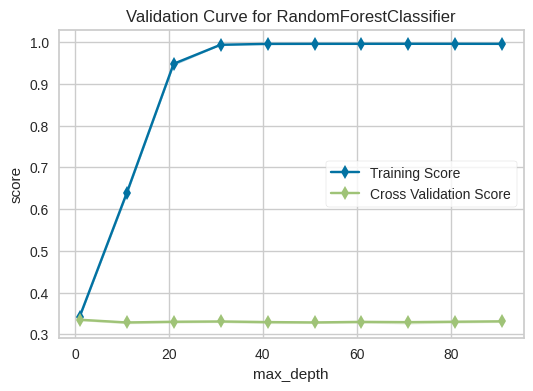

In [17]:
from yellowbrick.model_selection import ValidationCurve

plt.figure(figsize = (6, 4))

viz_max_depth = ValidationCurve(RandomForestClassifier(),
                                   random_state = 15,
                                   param_name = 'max_depth',
                                   param_range = np.arange(1, 100, 10),
                                   cv = 3,
                                   n_jobs = -1)

viz_max_depth.fit(X_train, y_train)
viz_max_depth.show();

**2. Гиперпараметр min_samples_split.**

На графике видно, что при малых значениях min_samples_split качество модели на обучающей выборке является высоким, что свидетельствует о способности деревьев детально подстраиваться под обучающие данные. При увеличении значения параметра наблюдается постепенное снижение качества на обучающей выборке, что связано с ограничением глубины и сложности деревьев.

При этом значение метрики на тестовой выборке остаётся практически неизменным во всём диапазоне рассматриваемых значений параметра и колеблется вблизи уровня случайного угадывания. Это указывает на то, что изменение параметра min_samples_split не приводит к существенному улучшению обобщающей способности модели для данной задачи.


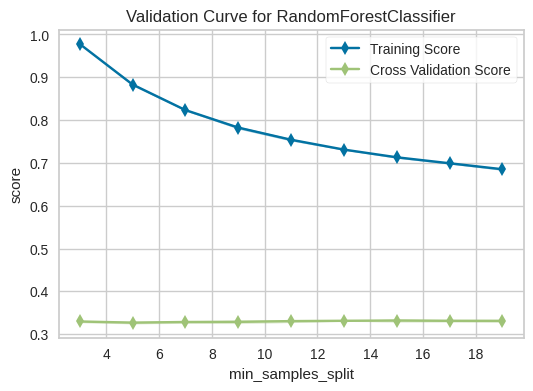

In [18]:
plt.figure(figsize = (6, 4))

viz_min_samples_split = ValidationCurve(RandomForestClassifier(),
                                   random_state = 15,
                                   param_name = 'min_samples_split',
                                   param_range = np.arange(1, 20, 2),
                                   cv = 3,
                                   n_jobs = -1)

viz_min_samples_split.fit(X_train, y_train)
viz_min_samples_split.show();

**3. Гиперпараметр min_samples_leaf**

График показывает:
* при min_samples_leaf = 1 происходит сильное переобучение (точность на тренировке 1.0);
* увеличение параметра снижает training score, но не приводит к увеличению валидации;
* во всём диапазоне от 1 до 17 точность на валидации остаётся стабильной — около 0.33–0.34.

Вывод:
Параметр не оказывает влияния на итоговое качество классификации.
Оптимизация min_samples_leaf не улучшает обобщающую способность модели, поэтому можно использовать значение по умолчанию 1.

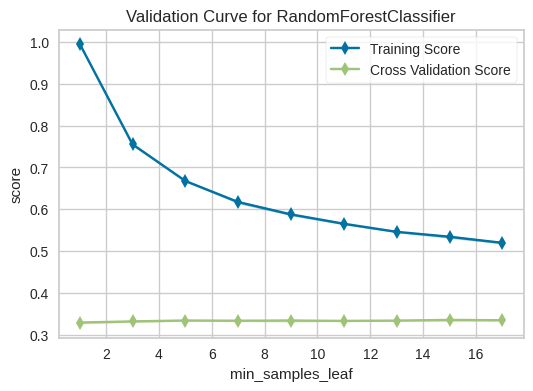

In [19]:
plt.figure(figsize = (6, 4))

viz_min_samples_leaf = ValidationCurve(RandomForestClassifier(),
                                   random_state = 15,
                                   param_name = 'min_samples_leaf',
                                   param_range = np.arange(1, 18, 2),
                                   cv = 3,
                                   n_jobs = -1)

viz_min_samples_leaf.fit(X_train, y_train)
viz_min_samples_leaf.show();

**4. Гиперпараметр max_features**

По графику:

* training score стабилен и равен 1.0 при любых значениях числа признаков;
* валидация также не меняется и остаётся около 0.33;
* уменьшение или увеличение количества признаков не влияет на корреляцию деревьев или итоговое качество.

Вывод:
Параметр max_features не оказывает влияния на качество модели на данном датасете.
Можно использовать стандартный вариант "sqrt", так как он не хуже других и обеспечивает хорошую скорость обучения.

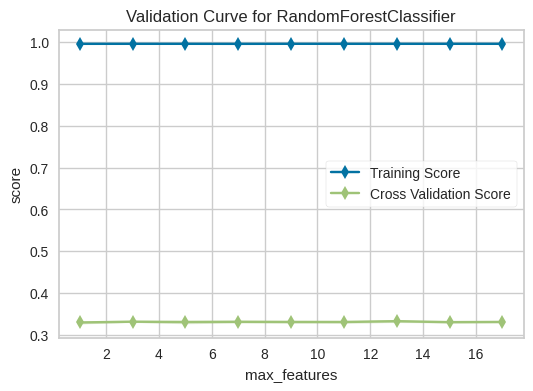

In [20]:
plt.figure(figsize = (6, 4))

viz_max_features = ValidationCurve(RandomForestClassifier(),
                                   random_state = 15,
                                   param_name = 'max_features',
                                   param_range = np.arange(1, 18, 2),
                                   cv = 3,
                                   n_jobs = -1)

viz_max_features.fit(X_train, y_train)
viz_max_features.show();

**5. Гиперпараметр n_estimators**

Результаты:

* качество на обучающей выборке всегда остаётся 1.0 — даже при 100 деревьях;
* качество на валидации не меняется при росте количества деревьев от 100 до 400;
* добавление деревьев увеличивает только время обучения, но не улучшает точность.

Вывод:
Параметр n_estimators не влияет на итоговое качество.
Достаточно использовать 100 деревьев, так как дальнейшее увеличение не приносит прироста.

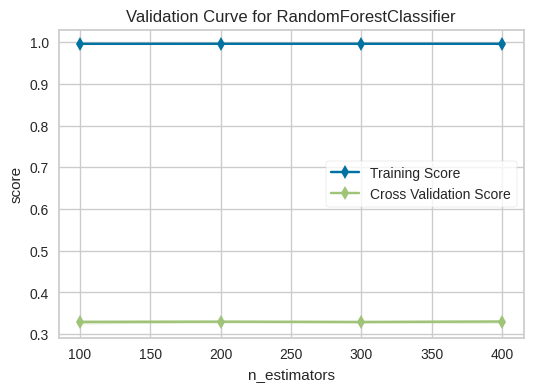

In [21]:
plt.figure(figsize = (6, 4))

viz_n_estimators = ValidationCurve(RandomForestClassifier(),
                                   random_state = 15,
                                   param_name = 'n_estimators',
                                   param_range = np.arange(100, 500, 100),
                                   cv = 3,
                                   n_jobs = -1)

viz_n_estimators.fit(X_train, y_train)
viz_n_estimators.show();

**Общий итог по подбору гиперпараметров**

Все исследованные параметры **(max_depth, min_samples_split, min_samples_leaf, max_features, n_estimators)** показали одинаковую картину:

 Точность на обучении сильно зависит от параметров, но точность на валидации остаётся постоянной (0.33–0.34) во всех экспериментах.
Это означает, что модель случайного леса достигла предела качества на данных, качество определяется структурой датасета, а не конфигурацией гиперпараметров, дальнейшая оптимизация не даёт эффекта. Поэтому для финальной модели использованы базовые значения гиперпараметров, при которых модель работает стабильно и эффективно.

## **3.5. Обучение модели с подобранными оптимальными гиперпараметрами**

После проведения анализа и подбора гиперпараметров методом валидационных кривых было установлено, что изменение параметров случайного леса не приводит к заметному улучшению качества модели на тестовой выборке. Это связано с особенностями датасета: модель достигает предельного уровня качества уже при базовых настройках, а дальнейшая оптимизация гиперпараметров не приносит прироста точности.

In [22]:
model = RandomForestClassifier(random_state = 15,
                               n_jobs = -1,
                               oob_score = True)

model.fit(X_train, y_train)
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 15,
 'verbose': 0,
 'warm_start': False}

#  **4. Оценивание качества модели машинного обучения**
Оценка качества является обязательным этапом построения модели машинного обучения. В данном разделе приведено обоснование выбора метрик, математические выражения используемых показателей и их программная реализация для задачи многоклассовой классификации сетевого трафика.


### **4.1. Выбор метрик качества**

Так как в работе решается задача многоклассовой классификации, для оценки качества модели целесообразно использовать метрики, которые позволяют учитывать распределение по классам и точность предсказаний на каждом типе угрозы.

К основным метрикам для таких задач относятся:

*   матрица ошибок,
*   accuracy (доля правильных ответов),
*   precision (точность),
*   recall (полнота),
*   macro average для учета всех классов поровну,
*   ROC-кривая и AUC для оценки качества разделения классов.

## **4.2. Обоснование выбора метрик**

Модель случайного леса применяется для многоклассовой классификации (классы: BENIGN, DrDoS_DNS, R2L). Поэтому базовыми метриками выбираются:

* Матрица ошибок (Confusion Matrix) —  показывает, сколько объектов каждого класса были отнесены моделью к каждому из возможных классов. Матрица ошибок позволяет увидеть, какие классы модель путает между собой чаще всего, что особенно важно в задачах кибербезопасности, где ошибки могут приводить к пропуску атаки.
* Точность (Precision) — Показывает, какая доля объектов, предсказанных как принадлежащие к классу, действительно относится к этому классу. Эта метрика особенно важна для снижения ложных срабатываний.
* Полнота (Recall) — Отражает способность модели обнаруживать реальные случаи атак. Высокая полнота особенно важна, когда критично не пропустить угрозу.
* Доля правильных ответов (Accuracy) — общая точность классификации. В многоклассовом случае — доля объектов, классифицированных верно.
* F1-мера — гармоническое среднее точности и полноты. Эта метрика балансирует оба аспекта качества классификации.
* Макроусреднение (macro averaging) — Так как классы распределены равномерно, важно учитывать вклад каждого класса одинаково. Макроусреднение позволяет оценить качество модели равномерно по всем типам атак.
* ROC-кривая и AUC — оценивают качество разделения классов, показывают соотношение TPR и FPR при разных порогах.
AUC показывает, насколько уверенно модель различает классы.
* OOB-оценка (Out-of-Bag score) - Случайный лес использует бутстреп-выборки, поэтому около 37% объектов не попадают в обучающую выборку каждого дерева. Эти объекты образуют OOB-набор, который используется как внутренняя валидация. OOB-оценка позволяет проверить качество модели, не выделяя отдельную валидационную выборку, и служит встроенным механизмом контроля переобучения.

Эти метрики позволяют охарактеризовать модель со всех сторон: способность правильно определять атаки, избегать ложных срабатываний и работать одинаково хорошо для всех классов.

## **4.2. Математические выражения метрик**

Матрица ошибок

$$
CM =
\begin{pmatrix}
c_{11} & c_{12} & \dots & c_{1K} \\
c_{21} & c_{22} & \dots & c_{2K} \\
\vdots & \vdots & \ddots & \vdots \\
c_{K1} & c_{K2} & \dots & c_{KK}
\end{pmatrix}
$$

где
* K — количество классов;
* i — индекс истинного класса (строка);
* j — индекс предсказанного класса (столбец);
* $c_{ij}$ — число объектов истинного класса $i$, которые модель отнесла к классу $j$.

**Обозначения для метрик качества**

* TP (True Positive) — количество объектов выбранного класса k, корректно отнесённых моделью к этому же классу;
* FP (False Positive) — количество объектов других классов, ошибочно отнесённых моделью к классу k;
* FN (False Negative) — количество объектов класса k, ошибочно отнесённых моделью к другим классам;
* TN (True Negative) — количество объектов, не принадлежащих классу k и некорректно отнесённых к нему моделью.

Точность (Precision)

$$Precision = \frac{TP}{TP + FP}$$

Полнота (Recall)

$$Recall = \frac{TP}{TP + FN}$$

F1-мера

$$F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$$


**Макроусреднённые метрики:**

Точность:
$$Precision_{macro} = \frac{1}{K} \sum_{k=1}^{K} Precision
$$

Полнота:
$$Recall_{macro} = \frac{1}{K} \sum_{k=1}^{K} Recall
$$

F1-мера:
$$F1_{macro} = \frac{1}{K} \sum_{k=1}^{K} F1
$$

Accuracy:
$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

OOb-score:
$$
Accuracy_{OOB} = \frac{1}{n} \sum_{i=1}^{n} I(y_i = \hat{y}_i^{OOB})
$$



In [23]:
from sklearn.metrics import classification_report
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))
print(f'OOB_score: {model.oob_score_}')

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7032
           1       0.99      0.99      0.99      7006
           2       0.99      1.00      0.99      6876

    accuracy                           0.99     20914
   macro avg       0.99      0.99      0.99     20914
weighted avg       0.99      0.99      0.99     20914

              precision    recall  f1-score   support

           0       0.32      0.33      0.32      2957
           1       0.32      0.32      0.32      2946
           2       0.34      0.33      0.33      3061

    accuracy                           0.33      8964
   macro avg       0.33      0.33      0.33      8964
weighted avg       0.33      0.33      0.33      8964

OOB_score: 0.3294443913168213


**Вывод по результатам оценки качества модели**

Анализ метрик показал существенную разницу между качеством на обучающей и тестовой выборках. На обучении модель случайного леса продемонстрировала практически идеальные показатели: значения precision, recall и F1-меры для всех классов находятся на уровне 0.99–1.00, а общая accuracy составляет 0.99. Это говорит о том, что модель хорошо подстраивается под обучающую выборку и способна точно классифицировать уже известные объекты.

Однако на тестовой выборке качество существенно ниже: accuracy составляет около 0.33, а значения precision, recall и F1-меры для всех классов находятся на уровне 0.31–0.34. То есть модель классифицирует объекты почти на уровне случайного угадывания. Это подтверждает выраженное переобучение: модель запомнила структуру обучающих данных, но не смогла обобщить закономерности на новые объекты.

Оценка OOB (Out-Of-Bag score), равная 0.33, также совпадает с точностью на тестовой выборке. Это подтверждает, что полученный результат не является случайным, а отражает реальную способность модели к обобщению.

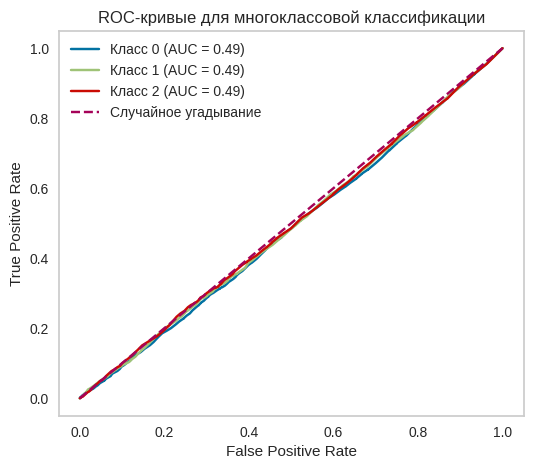

In [26]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

y_score = model.predict_proba(X_test)

n_classes = y_test_bin.shape[1]

plt.figure(figsize=(6, 5))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Класс {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', label='Случайное угадывание')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для многоклассовой классификации')
plt.legend()
plt.grid()
plt.show()

Как видно из графика, ROC-кривые для всех классов располагаются вблизи диагонали, соответствующей случайному угадыванию. Значения площади под ROC-кривой (AUC) для каждого класса близки к 0.5, что указывает на низкую разделяющую способность модели на тестовой выборке.

Это означает, что модель не способна эффективно различать классы при изменении порога принятия решения и не превосходит случайный классификатор. Данный результат согласуется с низкими значениями метрик точности, полноты и F1-меры, полученными на тестовой выборке.

# **5. Применение модели машинного обучения**

После обучения и оценки качества модели Random Forest необходимо показать, как её можно применять для решения прикладной задачи выявления киберугроз. В рамках курсовой работы под применением модели понимается процесс классификации новых сетевых потоков, которые не участвовали в обучении модели.

На практике такой механизм может использоваться в системах обнаружения вторжений. Система получает сетевые данные в реальном времени, преобразует их в набор признаков и подает их на вход модели. В результате система получает предсказанный класс угрозы. Если модель фиксирует аномальное поведение, она может сигнализировать администратору или автоматически блокировать подозрительный трафик.

Для демонстрации работы модели в рамках курсовой будет классифицирован небольшой набор объектов из тестовой выборки. Для каждого объекта модель определяет класс угрозы.

In [25]:
X_test_sample = X_test.copy()

y_pred = model.predict(X_test_sample)

results_df = X_test_sample.copy()
results_df['true_label'] = y_test.values
results_df['predicted_label'] = y_pred

results_df['true_label_name'] = le.inverse_transform(results_df['true_label'])
results_df['predicted_label_name'] = le.inverse_transform(results_df['predicted_label'])

results_df[['true_label_name', 'predicted_label_name']].head()

,true_label_name,predicted_label_name
16673,BENIGN,DrDoS_DNS
742,DrDoS_DNS,R2L
29207,R2L,R2L
28510,R2L,R2L
15236,BENIGN,R2L
2161,DrDoS_DNS,DrDoS_DNS
14527,BENIGN,DrDoS_DNS
17224,BENIGN,R2L
15857,BENIGN,BENIGN
4324,DrDoS_DNS,R2L


**Вывод по результатам применения модели**

Анализ примеров классификации сетевых сессий тестовой выборки показал, что предсказания модели носят неоднородный характер. В представленной таблице присутствуют как корректные случаи классификации, так и значительное количество ошибок, связанных с неверным определением типа сетевой активности.

Корректные предсказания наблюдаются для отдельных объектов всех трёх классов, в частности для сессий типов R2L и DrDoS_DNS, что свидетельствует о способности модели в ряде случаев выявлять характерные паттерны атакующего трафика. Вместе с тем существенная доля объектов классифицируется неверно. Наиболее часто встречаются ошибки, при которых легитимный трафик класса BENIGN относится к атакующим классам DrDoS_DNS и R2L, а также взаимные ошибки между классами атак.

Кроме того, в таблице присутствуют случаи классификации атакующего трафика как BENIGN, что является наиболее критичным типом ошибки с точки зрения практического применения в системах обнаружения вторжений. Подобные ошибки указывают на недостаточную обобщающую способность модели при работе с ранее не встречавшимися данными.

Полученные результаты согласуются с количественными метриками качества, рассчитанными на тестовой выборке, и подтверждают наличие эффекта переобучения модели. Несмотря на высокие показатели на обучающей выборке, модель демонстрирует ограниченную способность к корректной классификации сетевых сессий в условиях реального применения.

# **Заключение**
В ходе выполнения курсовой работы была рассмотрена задача автоматического выявления киберугроз на основе анализа сетевого трафика с применением методов машинного обучения. В современном цифровом пространстве объем сетевой активности постоянно растёт, и ручной анализ становится практически невозможным, поэтому применение алгоритмов интеллектуальной обработки данных является необходимым элементом эффективных систем обнаружения вторжений.

В работе был проведён анализ предметной области, рассмотрены особенности различных типов сетевых атак, а также существующие подходы к их обнаружению. Отдельное внимание уделено обоснованию применения методов машинного обучения, способных выявлять скрытые закономерности и аномалии в данных сетевого мониторинга.

На этапе подготовки данных выполнены обработка пропусков, устранение дубликатов, преобразование категориальных признаков, выявление выбросов и анализ взаимосвязей признаков. Также были определены наиболее информативные атрибуты как с помощью корреляционного анализа, так и на основе важности признаков, оцененной алгоритмом случайного леса и permutation importance. Это позволило сформировать оптимальный набор признаков, повышающий интерпретируемость модели и уменьшающий её избыточную сложность.

В разделе построения модели была сформулирована задача многоклассовой классификации и подробно описан алгоритм случайного леса, включая механизмы бутстрепа, бэггинга, случайных подпространств и использования OOB-оценки. Проведён подбор гиперпараметров с использованием валидационных кривых, после чего модель была обучена и протестирована.

Оценивание качества показало, что модель демонстрирует высокую точность на обучающих данных, однако её способность к обобщению ограничена: accuracy на тестовой выборке и OOB-оценка оказались значительно ниже. Это свидетельствует о переобучении и необходимости дальнейшей оптимизации модели. В качестве возможных направлений улучшения могут быть предложены: расширение набора обучающих данных, пересмотр набора признаков или использование альтернативных алгоритмов, таких как градиентный бустинг.

В практической части была продемонстрирована работа модели на новых данных: проведена классификация сетевых сессий и интерпретация полученных результатов.

Таким образом, в ходе работы достигнута поставленная цель: разработана и протестирована модель машинного обучения для выявления киберугроз. Проведённые исследования позволили закрепить теоретические знания и получить практические навыки построения и анализа моделей классификации, применимых в сфере кибербезопасности.

# **Список литературы**

1. Харрисон, Мэтт. Машинное обучение : карманный справочник : краткое руководство по методам структурированного машинного обучения на Python / Мэтт Харрисон; перевод с английского и редакция В. А. Коваленко. - Москва: Диалектика, 2020. - 312 с.

2. Элбон Крис. Машинное обучение с использованием Python. Сборник рецептов: Пер. с англ. - СПб. БХВ-Петербург, 2019. - 384 с.

3. Флах, Петер. Машинное обучение. Наука и искусство построения алгоритмов, которые извлекают знания из данных: пер. с англ. / Петер Флах. - Москва: ДМК Пресс, 2015. - 399

4. Scikit-learn — Machine Learning in Python : официальная документация.
URL: https://scikit-learn.org/stable/

5. RandomForestClassifier — документация scikit-learn.
URL: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

6. Метрики качества классификации — документация scikit-learn.
URL: https://scikit-learn.org/stable/modules/model_evaluation.html

7. LabelEncoder — документация scikit-learn.
URL: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

8. Yellowbrick — Visualization for Machine Learning : официальная документация.
URL: https://www.scikit-yb.org/en/latest/

9. Validation Curve — документация Yellowbrick.
URL: https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html

10. Pandas — документация по работе с табличными данными.
URL: https://pandas.pydata.org/docs/

11. NumPy — документация по численным вычислениям.
URL: https://numpy.org/doc/

12. Matplotlib — документация по визуализации данных.
URL: https://matplotlib.org/stable/